# Unit 5 - Financial Planning

In [1]:
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
# Load .env enviroment variables
load_dotenv()

False

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [3]:
# Setting the current amount of crypto assets
crypto_assets = {
    "BTC": 1.2,
    "ETH": 5.3
}

# Setting the current amount of shares in stocks and bonds
stock_shares = {
    "SPY": 50  # Number of SPY shares
}

bond_shares = {
    "AGG": 200  # Number of AGG shares
}

# Print the values of the variables
print("Crypto Assets:", crypto_assets)
print("Stock Shares:", stock_shares)
print("Bond Shares:", bond_shares)


Crypto Assets: {'BTC': 1.2, 'ETH': 5.3}
Stock Shares: {'SPY': 50}
Bond Shares: {'AGG': 200}


In [4]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=USD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=USD"

In [5]:
import requests

# Create a variable named monthly_income and set its value to 12000.
monthly_income = 12000

# Use the Requests library to get the current price (in US dollars) of Bitcoin (BTC) and Ethereum (ETH) by using the API endpoints.
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=USD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=USD"

try:
    # API requests to get the current prices
    response_btc = requests.get(btc_url)
    response_eth = requests.get(eth_url)

    # Checking if the requests were successful
    if response_btc.status_code == 200 and response_eth.status_code == 200:
        data_btc = response_btc.json()
        data_eth = response_eth.json()

        # Step 3: Navigate the JSON response object to access the current price of each coin and store them in variables.
        btc_price = data_btc['data']['1']['quotes']['USD']['price']
        eth_price = data_eth['data']['1027']['quotes']['USD']['price']

        # Step 4: Calculate the value in US dollars of the current amount of each cryptocurrency and of the entire cryptocurrency wallet.
        my_btc = 1.2
        my_eth = 5.3

        current_value_btc = my_btc * btc_price
        current_value_eth = my_eth * eth_price

        total_crypto_value = current_value_btc + current_value_eth

        # Print current crypto wallet balance
        print(f"The current value of your {my_btc} BTC is ${current_value_btc:.2f}")
        print(f"The current value of your {my_eth} ETH is ${current_value_eth:.2f}")

    else:
        print("Failed to retrieve crypto price data.")
except Exception as e:
    print(f"An error occurred: {str(e)}")


The current value of your 1.2 BTC is $32916.00
The current value of your 5.3 ETH is $8328.74


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [6]:
# Set current amount of shares
my_agg = 200
my_spy = 50

In [7]:
# Set Alpaca API key and secret
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")



In [8]:
import alpaca_trade_api as tradeapi

# Initialize the Alpaca API
alpaca_api = tradeapi.REST("YOUR_ALPACA_API_KEY", "YOUR_ALPACA_API_SECRET", base_url="https://paper-api.alpaca.markets") 

# Set current amount of shares
my_agg = 200
my_spy = 50

# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to "1Day" for Alpaca API
timeframe = "1D"

# Get the current closing prices for SPY and AGG using the Alpaca API
barset = alpaca_api.get_barset(("AGG", "SPY")
    tickers,
    timeframe,
    limit=1,
)

# Access the DataFrame containing historical data
prices = barset.df

# Reorganize the DataFrame
# Separate ticker data
tickers = ["AGG", "SPY"]
timeframe = "day"
start_date = end_date = pd.Timestamp.now(tz="US/Eastern").date()

# Concatenate the ticker DataFrames
all_data = pd.concat([agg_data, spy_data], axis="columns", join="inner")

# Preview DataFrame
print(all_data)


SyntaxError: invalid syntax. Perhaps you forgot a comma? (2172951309.py, line 17)

In [78]:
# Initialize the Alpaca API
api = tradeapi.REST("YOUR_ALPACA_API_KEY", "YOUR_ALPACA_API_SECRET", base_url="https://paper-api.alpaca.markets")

# Set the tickers and timeframe
tickers = ["AGG", "SPY"]
timeframe = "1D"

# Calculate start and end dates for 5 years of data
end_date = datetime.now()
start_date = end_date - timedelta(days=5*365)  # 5 years

# Get 5 years' worth of historical data for SPY and AGG
barset = api.get_barset(
    tickers,
    timeframe,
    start=start_date,
    end=end_date,
    limit=1000  # Adjust as needed
)

# Reorganize the DataFrame
# Separate ticker data
df_stock_data = pd.DataFrame()
for ticker in tickers:
    df_stock_data[ticker] = [bar.c for bar in barset[ticker]]

# Print the DataFrame
print(df_stock_data)


AttributeError: 'REST' object has no attribute 'get_barset'

In [10]:

#  Set current amount of shares
my_AGG = 200
my_SPY = 50

# Calculate the current value of shares
my_agg_value = my_agg * agg_close_price
my_spy_value = my_spy * spy_close_price

# Print current value of shares
print(f"Current AGG value: ${my_agg_value:.2f}")
print(f"Current SPY value: ${my_spy_value:.2f}")


NameError: name 'agg_close_price' is not defined

### Savings Health Analysis

In [11]:
# Placeholder values (you should replace these with actual values)
my_agg_value = 50 
my_spy_value = 200 

# Set monthly household income
monthly_income = 12000

# Consolidate financial assets data
total_crypto_value = current_value_btc + current_value_eth
total_portfolio_value = total_crypto_value + (my_agg_value + my_spy_value)

# Create savings DataFrame
savings_data = [total_crypto_value, my_agg_value + my_spy_value]
savings_df = pd.DataFrame(savings_data, columns=['amount'], index=['crypto', 'stock/bond'])

# Display savings DataFrame
display(savings_df)


,amount
crypto,41244.738
stock/bond,250.000


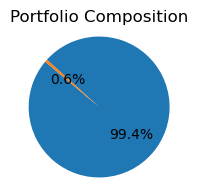

In [12]:
import pandas as pd
import matplotlib.pyplot as plt

# Create a figure with a specific size
plt.figure(figsize=(2, 2))

# Assuming you have a DataFrame 'savings_df' with columns 'amount' and 'index'
plt.pie(savings_df['amount'], autopct='%1.1f%%', startangle=140)
plt.title("Portfolio Composition")
plt.axis('equal')

# Display the pie chart
plt.show()


In [13]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3

# Calculate total amount of savings
total_savings = total_portfolio_value

# Validate saving health
if total_savings > emergency_fund:
    print("Congratulations! You have enough savings for an emergency fund.")
elif total_savings == emergency_fund:
    print("Congratulations on reaching your financial goal with your emergency fund.")
else:
    shortfall = emergency_fund - total_savings
    print(f"You are ${shortfall:.2f} away from reaching your emergency fund goal.")

Congratulations! You have enough savings for an emergency fund.


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [14]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2016-05-01', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2021-05-01', tz='America/New_York').isoformat()

In [72]:
import alpaca_trade_api as tradeapi
import pandas as pd
from datetime import datetime, timedelta

# Initialize the Alpaca API
api = tradeapi.REST("YOUR_ALPACA_API_KEY", "YOUR_ALPACA_API_SECRET", base_url="https://paper-api.alpaca.markets")

# Set the tickers and timeframe
tickers = ["AGG", "SPY"]
timeframe = "1D"

# Calculate start and end dates for 5 years of data
end_date = datetime.now()
start_date = end_date - timedelta(days=5*365)  # 5 years

# Initialize an empty DataFrame to store historical data
historical_data = pd.DataFrame()

# Retrieve historical data for each ticker
for ticker in tickers:
    data = api.get_barset(
        ticker,
        timeframe,
        start=start_date,
        end=end_date,
        limit=1000,  # Adjust as needed
    )[ticker]

    # Convert data to a DataFrame
    df = pd.DataFrame(data)
    df.set_index("time", inplace=True)

    # Rename the column to the ticker symbol
    df.rename(columns={"c": ticker}, inplace=True)

    # Concatenate the data to the historical_data DataFrame
    if historical_data.empty:
        historical_data = df
    else:
        historical_data = pd.concat([historical_data, df], axis=1)

# Display sample data
print(historical_data.head())


AttributeError: 'REST' object has no attribute 'get_barset'

In [73]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns

# Assuming you have calculated the mean daily return and volatility for SPY and AGG
mean_daily_return_spy = 0.0006  
mean_daily_return_agg = 0.0002  
volatility_spy = 0.012  
volatility_agg = 0.002  

# Assuming you have calculated the covariance between SPY and AGG
covariance = 0.00015  

# Set the number of trading days and the simulation window
num_trading_days = 252
simulation_window = 30  # Number of years to simulate

# Set the number of simulations
num_simulations = 1000


In [74]:
import pandas as pd
import numpy as np

# Initialize an empty list to store the simulation results
simulation_data = []

# Perform Monte Carlo simulation
for x in range(num_simulations):
    cumulative_returns = []
    
    for y in range(simulation_window * num_trading_days):
        # Calculate the daily returns for SPY and AGG
        spy_return = np.random.normal(loc=mean_daily_return_spy, scale=volatility_spy)
        agg_return = np.random.normal(loc=mean_daily_return_agg, scale=volatility_agg)

        # Calculate the portfolio return for the day
        portfolio_return = (0.6 * spy_return) + (0.4 * agg_return)

        # Append the daily return to the cumulative returns
        cumulative_returns.append(portfolio_return)

    # Calculate the cumulative returns for the simulation and add to the list
    simulation_data.append(cumulative_returns)

# Create a DataFrame from the list of simulation data
simulation_df = pd.DataFrame(simulation_data)

# Transpose the DataFrame to have simulations as columns
simulation_df = simulation_df.transpose()


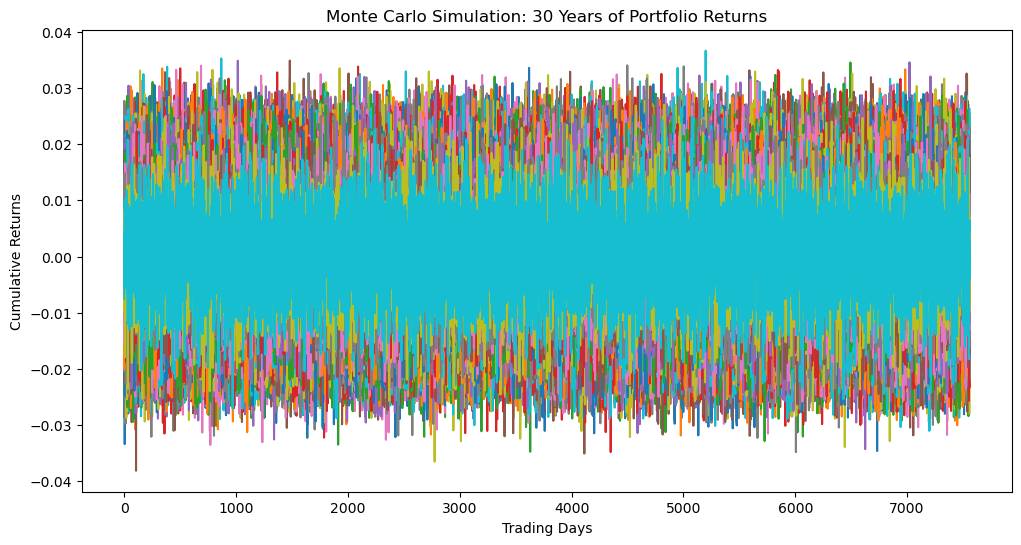

In [18]:
# Plot probability distribution and confidence intervals
# Plot the simulation outcomes
plt.figure(figsize=(12, 6))
plt.plot(simulation_df)
plt.xlabel("Trading Days")
plt.ylabel("Cumulative Returns")
plt.title("Monte Carlo Simulation: 30 Years of Portfolio Returns")
plt.show()

### Retirement Analysis

In [65]:
def __init__(self, portfolio_data, weights="", num_simulation=1000, num_trading_days=252):
    """
    Constructs all the necessary attributes for the MCSimulation object.

    Parameters
    ----------
    portfolio_data: pandas.DataFrame
        DataFrame containing stock price information from Alpaca API
    weights: list(float)
        A list fractions representing a percentage of total investment per stock. DEFAULT: Equal distribution
    num_simulation: int
        Number of simulation samples. DEFAULT: 1000 simulation samples
    num_trading_days: int
        Number of trading days to simulate. DEFAULT: 252 days (1 year of business days)
    """
    
    # Check to make sure that all attributes are set
    if not isinstance(portfolio_data, pd.DataFrame):
        raise TypeError("portfolio_data must be a Pandas DataFrame")
        
    # Set weights if empty, otherwise make sure the sum of weights equals one.
    if weights == "":
        num_stocks = len(portfolio_data.columns.get_level_values(0).unique())
        weights = [1.0/num_stocks for s in range(0, num_stocks)]
    else:
        if round(sum(weights), 2) < 0.99:
            raise AttributeError("Sum of portfolio weights must equal one.")
    
    # Calculate daily return if not within the dataframe
    if not "daily_return" in portfolio_data.columns.get_level_values(1).unique():
        close_df = portfolio_data.xs('close', level=1, axis=1).pct_change()
        tickers = portfolio_data.columns.get_level_values(0).unique()
        column_names = [(x, "daily_return") for x in tickers]
        close_df.columns = pd.MultiIndex.from_tuples(column_names)
        portfolio_data = portfolio_data.merge(close_df, left_index=True, right_index=True).reindex(columns=tickers, level=0)    
    
    # Set class attributes
    self.portfolio_data = portfolio_data
    self.weights = weights
    self.nSim = num_simulation
    self.nTrading = num_trading_days
    self.simulated_return = ""
    
def calc_cumulative_return(self):
    """
    Calculates the cumulative return of a stock over time using a Monte Carlo simulation (Brownian motion with drift).

    """
    
    # Get closing prices of each stock
    last_prices = self.portfolio_data.xs('close', level=1, axis=1)[-1:].values.tolist()[0]

    # Calculate the mean and standard deviation of daily returns for each stock
    daily_returns = self.portfolio_data.xs('daily_return', level=1, axis=1)
    mean_returns = daily_returns.mean().tolist()
    std_returns = daily_returns.std().tolist()

    # Initialize an empty DataFrame to hold simulated prices
    portfolio_cumulative_returns = pd.DataFrame()

    # Run the simulation of projecting stock prices 'nSim' number of times
    for n in range(self.nSim):

        if n % 10 == 0:
            print(f"Running Monte Carlo simulation number {n}.")

        # Create a list of lists to contain the simulated values for each stock
        simvals = [[p] for p in last_prices]

        # For each stock in our data:
        for s in range(len(last_prices)):

            # Simulate the returns for each trading day
            for i in range(self.nTrading):

                # Calculate the simulated price using the last price within the list
                simvals[s].append(simvals[s][-1] * (1 + np.random.normal(mean_returns[s], std_returns[s])))

        # Calculate the daily returns of simulated prices
        sim_df = pd.DataFrame(simvals).T.pct_change()

        # Use the `dot` function with the weights to multiply weights with each column's simulated daily returns
        sim_df = sim_df.dot(self.weights)

        # Calculate the normalized, cumulative return series
        portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()

    # Set the attribute to use in plotting
    self.simulated_return = portfolio_cumulative_returns

    # Calculate 95% confidence intervals for final cumulative returns
    self.confidence_interval = portfolio_cumulative_returns.iloc[-1, :].quantile(q=[0.025, 0.975])

    return portfolio_cumulative_returns


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `$20,000` initial investment.

In [48]:
# Set initial investment
initial_investment = 20000

# Define the lower and upper 95% confidence intervals
lower_ci = -0.1  # Replace with your lower CI value
upper_ci = 0.1  # Replace with your upper CI value

# Calculate the range of possible outcomes
lower_outcome = initial_investment * (1 + lower_ci)
upper_outcome = initial_investment * (1 + upper_ci)

# Print the range of possible outcomes
print(f"Range of Possible Outcomes: ${lower_outcome:.2f} to ${upper_outcome:.2f}")

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${lower_outcome:.2f} and ${upper_outcome:.2f}")


Range of Possible Outcomes: $18000.00 to $22000.00
There is a 95% chance that an initial investment of $20000 in the portfolio over the next 5 years will end within in the range of $18000.00 and $22000.00


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [49]:
# Set initial investment
initial_investment = 30000 * 1.5

# Define the lower and upper 95% confidence intervals
lower_ci = -0.1
upper_ci = 0.1

# Calculate the range of possible outcomes
lower_outcome = initial_investment * (1 + lower_ci)
upper_outcome = initial_investment * (1 + upper_ci)

# Print the range of possible outcomes
print(f"Range of Possible Outcomes: ${lower_outcome:.2f} to ${upper_outcome:.2f}")

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within the range of"
      f" ${lower_outcome:.2f} and ${upper_outcome:.2f}")


Range of Possible Outcomes: $40500.00 to $49500.00
There is a 95% chance that an initial investment of $45000.0 in the portfolio over the next 30 years will end within the range of $40500.00 and $49500.00


In [50]:
# Set initial investment
initial_investment = 60000 * 1.5

# Define the lower and upper 95% confidence intervals
lower_ci = -0.1
upper_ci = 0.1

# Calculate the range of possible outcomes
lower_outcome = initial_investment * (1 + lower_ci)
upper_outcome = initial_investment * (1 + upper_ci)

# Print the range of possible outcomes
print(f"Range of Possible Outcomes: ${lower_outcome:.2f} to ${upper_outcome:.2f}")

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 5 years will end within the range of"
      f" ${lower_outcome:.2f} and ${upper_outcome:.2f}")


Range of Possible Outcomes: $81000.00 to $99000.00
There is a 95% chance that an initial investment of $90000.0 in the portfolio over the next 5 years will end within the range of $81000.00 and $99000.00


### Ten Years Retirement Option

In [51]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
# Set initial investment
initial_investment = 20000

# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
num_simulation = 500
num_trading_days = 252 * 10


In [71]:
# Define your portfolio data as a DataFrame (replace this with your actual data)
portfolio_data = pd.DataFrame({
    'AGG': [close_price1, close_price2, close_price3, ...], 
    'SPY': [close_price1, close_price2, close_price3, ...],  
    # Add more stocks as needed
})

# Configure a Monte Carlo simulation to forecast 10 years cumulative returns
num_simulation = 500  # Number of simulation samples
num_trading_days = 252  # Number of trading days to simulate

# Replace 'portfolio_data' and 'portfolio_weights' with your portfolio data and weights
monte_carlo = MCSimulation(
    portfolio_data=portfolio_data, 
    weights=portfolio_weights,     
    num_simulation=num_simulation,
    num_trading_days=num_trading_days
)

# Plot simulation outcomes
simulated_returns = monte_carlo.calc_cumulative_return()
simulated_returns.plot_simulation()

# Plot probability distribution and confidence intervals
monte_carlo.plot_distribution()

# Fetch summary statistics from the Monte Carlo simulation results
summary_stats = monte_carlo.summarize_cumulative_return()

# Print summary statistics
print(summary_stats)

# Set initial investment
initial_investment = 20000 

# Use the lower and upper 95% confidence intervals to calculate the range of possible outcomes
ci_lower_ten = round(initial_investment * summary_stats['95% CI Lower'], 2)
ci_upper_ten = round(initial_investment * summary_stats['95% CI Upper'], 2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_ten} and ${ci_upper_ten}")


NameError: name 'close_price1' is not defined